In [73]:
import os

from vectorbt.generic.plotting import Volume

os.chdir('/home/rango/DataspellProjects/untitled/theseis')


In [74]:
from data import DataPross ,DataProvider
from model import lstm
import numpy as np
import torch
import os
print(os.getcwd())
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import os

from data import DataPross ,DataProvider
from model import transformer
import numpy as np
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split


/home/rango/DataspellProjects/untitled/theseis


In [75]:
data = DataPross.Data('data/EURUSDDayli.csv')


In [76]:
data.clean()
data.normalize()

In [77]:
data.visualize()

In [78]:
df = data.df

In [79]:
df['return'] = df['Close'].pct_change(periods=5)


<Axes: >

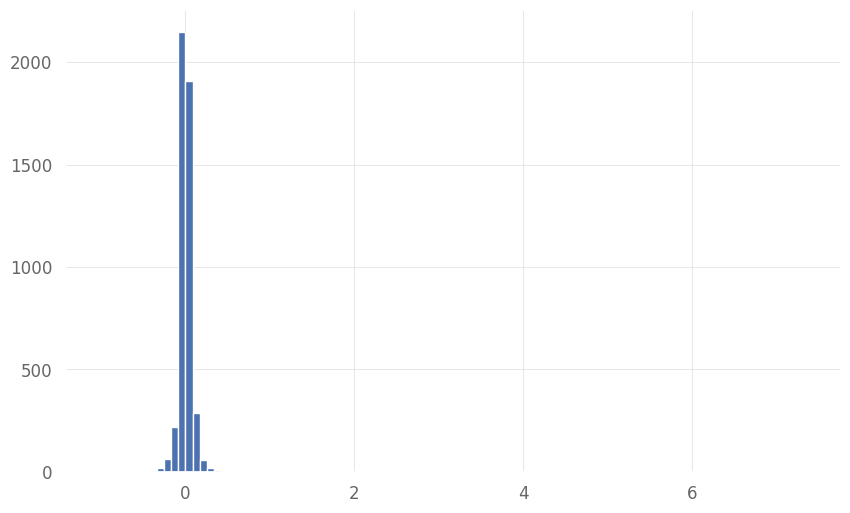

In [80]:
df['return'] = df['Close'].pct_change(periods=5)
df['return'].replace([float('inf'), float('-inf')], np.nan, inplace=True)
df['return'].dropna().hist(bins=100)


In [81]:
threshold = df['return'].abs().quantile(0.7)

In [84]:

df

,date,Open,High,Low,Close,Volume,return
0,2011-10-06,0.81431,0.82600,0.80391,0.83236,0.19996,NaN
1,2011-10-07,0.83232,0.84215,0.83009,0.82130,0.17982,NaN
2,2011-10-08,0.82130,0.80967,0.83293,0.82130,0.00000,NaN
3,2011-10-09,0.82111,0.81653,0.82577,0.82656,0.01967,NaN
4,2011-10-10,0.82658,0.87998,0.83692,0.87575,0.17496,NaN
...,...,...,...,...,...,...,...
4772,2024-10-29,0.26553,0.25255,0.26748,0.26601,0.18477,-0.00326
4773,2024-10-30,0.26599,0.26238,0.27596,0.27438,0.21084,0.05312
4774,2024-10-31,0.27435,0.26605,0.28381,0.27996,0.19987,0.07455
4775,2024-11-01,0.27994,0.26990,0.28112,0.26884,0.19812,0.03057


In [85]:
sequence_length = 30
forecast_horizon = 10
target_cols = 'Close'
threshold = 0.05

dataset = DataProvider.TrendPredictionDataset(df , sequence_length, forecast_horizon, target_cols , threshold )
X, y = [], []
for i in range(len(dataset)):
    x_i, y_i = dataset[i]
    X.append(x_i)
    y.append(y_i.item())

/home/rango/DataspellProjects/untitled/theseis/data/DataProvider.py:119: RuntimeWarning:

divide by zero encountered in double_scalars



In [89]:
close_prices = df['Close'].values
dataset = DataProvider.TrendPredictionDataset(...)
close_prices = df['Close'].values
dataset.visualize_labels_on_price(close_prices)




AttributeError: 'TrendPredictionDataset' object has no attribute 'visualize_labeled_trends'

In [ ]:
train_dataset = DataProvider.TransformerFinanceDataset(train_df , sequence_length=30, forecast_horizon=1, target_cols=['Close'])
val_dataset = DataProvider.TransformerFinanceDataset(val_df , sequence_length=30, forecast_horizon=1, target_cols=['Close'])
test_dataset = DataProvider.TransformerFinanceDataset(test_df , sequence_length=30, forecast_horizon=1, target_cols=['Close'])

In [66]:
Train = DataProvider.TrendPredictionDataset(df, sequence_length=30, forecast_horizon=10,
                 target_col='Close', threshold=0.05)

/home/rango/DataspellProjects/untitled/theseis/data/DataProvider.py:116: RuntimeWarning:

divide by zero encountered in double_scalars

